<a href="https://colab.research.google.com/github/ma22c041/ma22c041_2023_PL/blob/main/Assignment11/Neighbor's_color.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

In [2]:
def gen_states(n):
    states = []
    for i in range(2 ** n):
        state = format(i, f'0{n}b')  # Binary representation
        state = state.replace('0', 'R').replace('1', 'B')  # Replace 0 with 'R' and 1 with 'B'
        states.append(state)
    return states

n = 3
states = gen_states(n)
m=len(states)
print("Number of states=", m)
for state in states:
    print(state)

Number of states= 8
RRR
RRB
RBR
RBB
BRR
BRB
BBR
BBB


In [3]:
def trans_probability(n):
    transition_probs = {}
    for state in states:
        transition_probs[state] = {}
        for neighbor in states:
            diff_count = sum(1 for i in range(len(state)) if state[i] != neighbor[i])
            if diff_count == 1:
                transition_probs[state][neighbor] = 1 / n
            else:
                transition_probs[state][neighbor] = 0
    return transition_probs

transition_probs = trans_probability(n)

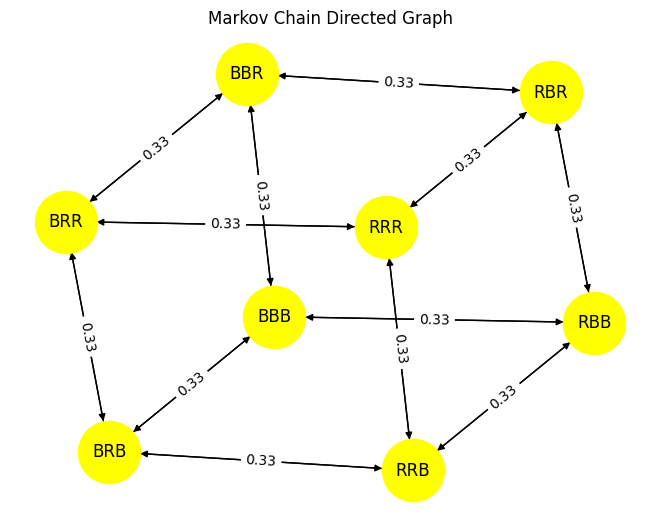

In [4]:
def Markov_chain(states, transition_probs):
    G = nx.DiGraph()
    G.add_nodes_from(states)

    for state in states:
        for neighbor, prob in transition_probs[state].items():
            if prob > 0:
                G.add_edge(state, neighbor, weight=prob)

    pos = nx.spring_layout(G)
    labels = {state: state for state in states}
    edge_labels = {(u, v): f"{p:.2f}" for u, v, p in G.edges(data='weight')}
    plt.figure()
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='yellow', labels=labels)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
    plt.title("Markov Chain Directed Graph")
    plt.show()

Markov_chain(states, transition_probs)

In [5]:
def Absorbing_states(states, transition_probs):
    absorb_states = [state for state in states if all(transition_probs[state][neighbor] == 0 for neighbor in states if neighbor != state)]
    return absorb_states

absorbing_states = Absorbing_states(states, transition_probs)
print(f"Absorbing states: {absorbing_states}")

Absorbing states: []


As we can see, the list is empty, so the state is not absorbing that is not an absorbing Markov Chain.

In [6]:
def compute_absorbing_probabilities(n):
    num_states = 2**n  # Total number of states

    # Initialize arrays to store absorbing states and probabilities
    absorbing_states = [0, n]  # 0 blue arcs and n red arcs
    absorbing_probabilities = np.zeros(num_states, dtype=float)

    # Calculate probabilities for absorbing states using binomial coefficients
    for k in absorbing_states:
        absorbing_probabilities += np.math.comb(n, k) / num_states

    return absorbing_probabilities

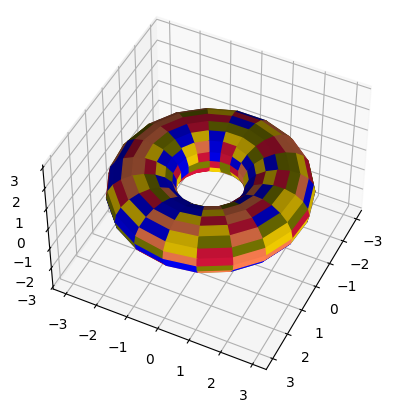

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Generate toroidal surface data (as you did in your original code)
angs = np.linspace(0, 2.*np.pi, 20)
theta, phi = np.meshgrid(angs, angs)
x = (2 + np.cos(theta)) * np.cos(phi)
y = (2 + np.cos(theta)) * np.sin(phi)
z = np.sin(theta)
rng = np.random.default_rng()
randind = rng.integers(5, size=x.shape)
colors = np.array(['crimson', 'coral', 'gold', 'blue', 'olive'])[randind]

# Plot the toroidal surface
surf = ax.plot_surface(x, y, z, facecolors=colors, linewidth=1)

# Set view angles and z-axis limits
ax.view_init(46, 26)
ax.set_zlim(-3, 3)

plt.show()

In [8]:
def simulate_toroidal_color_process(n, k, max_iterations=100):
    initial_state = np.random.randint(0, k, size=(n, n))

    absorbing_state = None
    for _ in range(max_iterations):
        i, j = np.random.randint(0, n, size=2) # Randomly select a rectangle

        di, dj = np.random.choice([-1, 0, 1], size=2, replace=True)  # Randomly select one of the 8 neighbors
        neighbor_i, neighbor_j = (i + di) % n, (j + dj) % n
        chosen_color = initial_state[neighbor_i, neighbor_j] # Choose the neighbor's color
        initial_state[i, j] = chosen_color

        if np.all(initial_state == initial_state[0, 0]):
            absorbing_state = initial_state
            break

    return initial_state, absorbing_state

In [9]:
def simulate_toroidal_color_process(n, k, max_iterations=1000, initial_state=None):
    if initial_state is None:
        initial_state = np.random.randint(0, k, size=(n, n))

    states = [initial_state.copy()]
    absorbing_state = None

    for _ in range(max_iterations):
        i, j = np.random.randint(0, n, size=2)
        di, dj = np.random.choice([-1, 0, 1], size=2, replace=True)
        neighbor_i, neighbor_j = (i + di) % n, (j + dj) % n
        chosen_color = initial_state[neighbor_i, neighbor_j]
        initial_state[i, j] = chosen_color
        states.append(initial_state.copy())
        if np.all(initial_state == initial_state[0, 0]):
            absorbing_state = initial_state
            break

    return states, absorbing_state

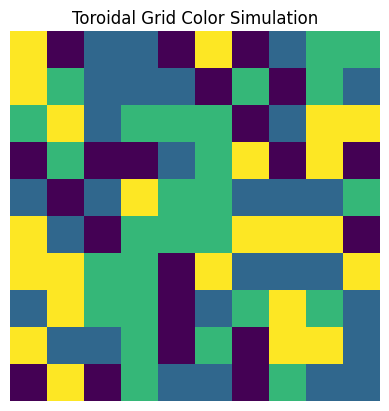

/usr/local/lib/python3.10/dist-packages/matplotlib/animation.py:884: UserWarning: Animation was deleted without rendering anything. This is most likely not intended. To prevent deletion, assign the Animation to a variable, e.g. `anim`, that exists until you output the Animation using `plt.show()` or `anim.save()`.
  warnings.warn(


In [10]:
def animate_simulation(n, k, max_iterations=1000):
    initial_state = np.random.randint(0, k, size=(n, n))
    states, absorbing_state = simulate_toroidal_color_process(n, k, max_iterations, initial_state)
    num_frames = len(states)
    fig, ax = plt.subplots()
    img = ax.imshow(states[0], cmap='viridis')

    def update(frame):
        img.set_array(states[frame])
        return img,

    # Create the animation
    anim = FuncAnimation(fig, update, frames=range(num_frames), repeat=False)
    plt.axis('off')
    plt.title("Toroidal Grid Color Simulation")
    plt.show()

n = 10
k = 4
max_iterations = 500
animate_simulation(n, k, max_iterations)